In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [401]:
data=pd.read_csv("F:\My Folder\Data Science\Project\Google Play App Rating Alanlysis\googleplaystore.csv")

In [381]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [382]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [384]:
data.shape

(10841, 13)

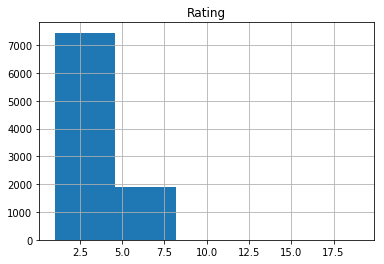

In [385]:
hist = data.hist(bins=5)

In [386]:
data.corr()

,Rating
Rating,1.0


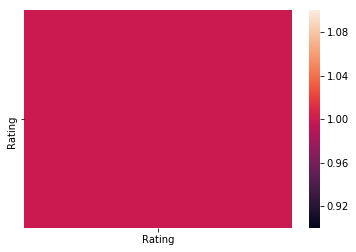

In [387]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [388]:
data.isnull().sum().sum()

1487

In [389]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [390]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

In [391]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [392]:
x = data.iloc[:, 3:6].values
y = data.iloc[:,2].values

In [393]:
x

array([['159', '19M', '10,000+'],
       ['967', '14M', '500,000+'],
       ['87510', '8.7M', '5,000,000+'],
       ...,
       ['3', '9.5M', '1,000+'],
       ['114', 'Varies with device', '1,000+'],
       ['398307', '19M', '10,000,000+']], dtype=object)

In [394]:
LE=LabelEncoder()
x[:,0] = LE.fit_transform(x[:,0])
x[:,1] = LE.fit_transform(x[:,1])
x[:,2] = LE.fit_transform(x[:,2])
# x[:,3] = LE.fit_transform(x[:,3])
# x[:,4] = LE.fit_transform(x[:,4])

In [395]:
x

array([[1182, 54, 7],
       [5923, 28, 19],
       [5680, 367, 14],
       ...,
       [2854, 413, 3],
       [355, 461, 3],
       [3579, 54, 8]], dtype=object)

In [396]:
y=LE.fit_transform(y)

In [397]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [398]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_test, y_test) 
print(neigh.predict(x_test))
score = neigh.score(x_test,y_test)
print(score)

[29 32 26 ... 21 32 26]
0.6016597510373444


In [399]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_test, y_test)
y_pred=clf.predict(x_test)
print(y_pred)
score = clf.score(x_test,y_test)
print(score)

[29 32 33 ... 31 32 34]
0.9880129091747349
